## What is KNN?

kNN stands for k Nearest Neighbors

It is a supervised learning algorithm.

But in essence supervised simply means that we require labelled data

It can solve both classification and regression problems.

A classification problem describes data with a discrete / categorical response variable -- e.g. smoker + age > 60 --> 5 on the risk scale

A regression problem describes data with a real numeric response variable e.g. 3 bedroom house + los angeles + 1400 square foot = $1.23 million

### KNN For Classification

## Implementation Of KNN classification on a dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\dell\Downloads\archive (1)\diabetes.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.shape

(768, 9)

### Data Cleaning

In [5]:
data.BloodPressure.value_counts

<bound method IndexOpsMixin.value_counts of 0      72
1      66
2      64
3      66
4      40
       ..
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 768, dtype: int64>

There are values in each column as 0, but they can not be 0 as that value is not possible so treating them as nan values and filling them.

In [6]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [7]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
#filling nan values
data['Glucose'].fillna(data['Glucose'].mean(), inplace = True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace = True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace = True)
data['Insulin'].fillna(data['Insulin'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].median(), inplace = True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000104CC7303A0>,
      dtype=object)

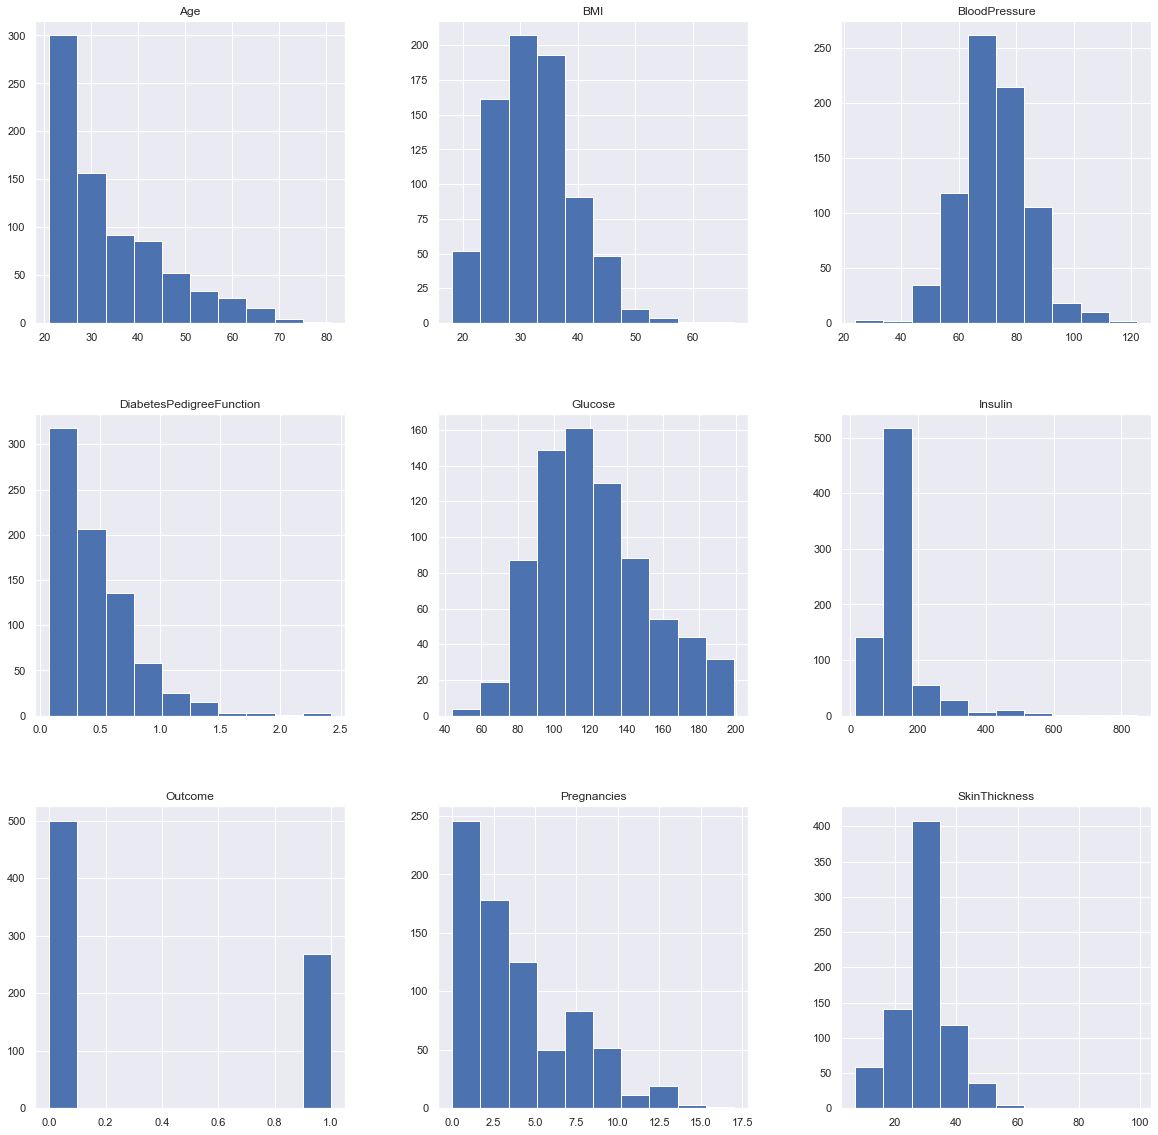

In [9]:
data.hist(figsize = (20,20))

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [11]:
#for telling percentage of classification
data.Outcome.value_counts(normalize = True)*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

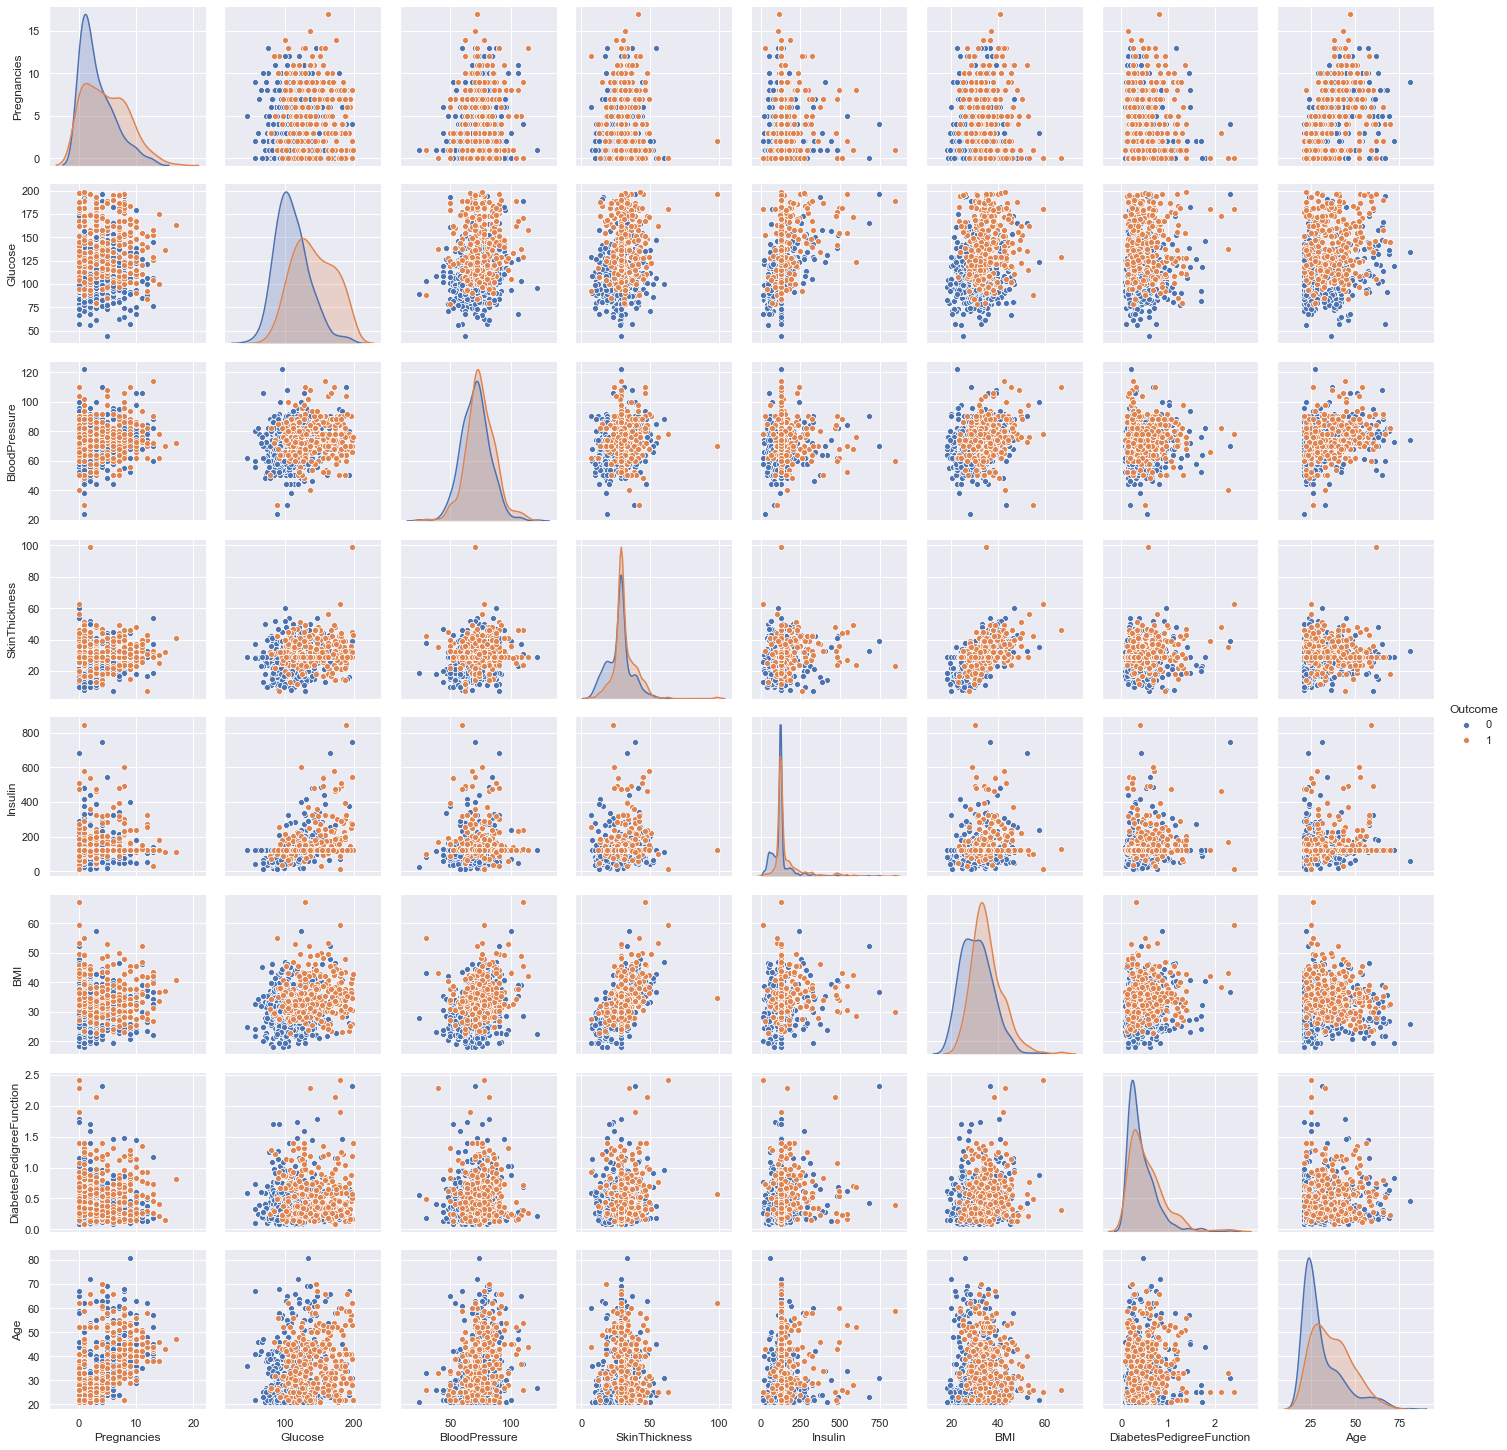

In [12]:
sns.pairplot(data, hue = 'Outcome')

Telling How the data is classified with each outcome with respect to columns.

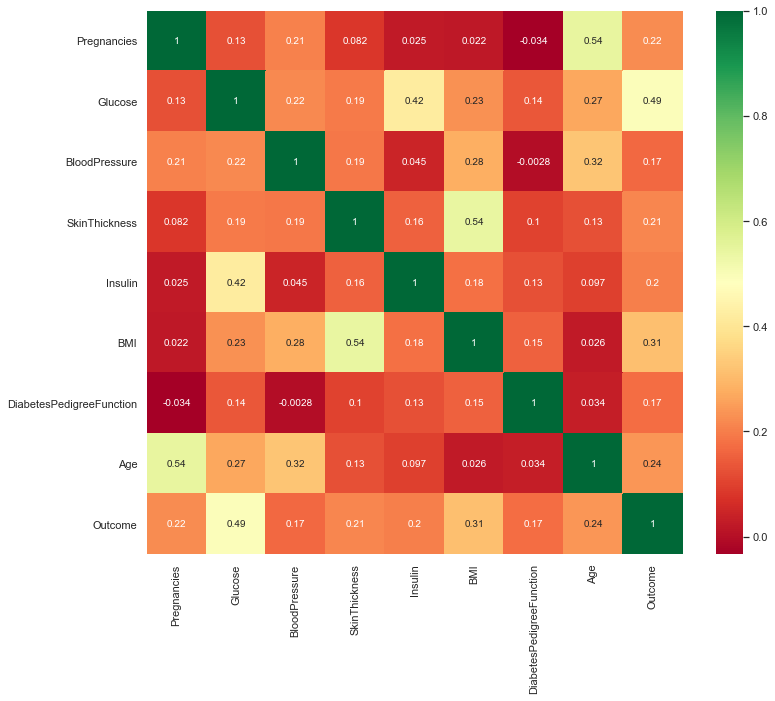

In [13]:
plt.figure(figsize=(12,10))

sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn') 

Colinearity between columns is not majorly high, still BMI, Age, Glucose have more colinearity than others. 

In [14]:
X = data
y = X.Outcome
X = X.drop("Outcome",1)

### Scaling The Data

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
X.shape

(768, 8)

### Train Test Split 

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42,stratify=y)

Stratify will maintain the proportion of the outcomes as it is in the data provided for example if there are 60% of 0's and 40% of 1's then it will try that in samples also the ratio is maintained.

In [31]:
y_train

209    1
176    0
147    0
454    0
636    0
      ..
214    1
113    0
556    0
759    1
107    0
Name: Outcome, Length: 537, dtype: int64

In [32]:
X_train.shape

(537, 8)

In [33]:
X_test.shape

(231, 8)

## Predicting Value Of K and Predicting Values On Test

In [58]:
#predicting on k value as 3
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')

knn.fit(X_train, y_train)

y_preds = knn.predict(X_test)

from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(y_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.7489177489177489


In [68]:
#finding k value on basis of accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(n_neighbors=i,p=2, metric='minkowski')
    knn.fit(X_train,y_train)
    
    y_preds = knn.predict(X_test)
    
    
    test_scores.append(accuracy_score(y_test,y_preds))
    print('Accuracy value for k= ' , i , 'is:', test_scores[i-1])

Accuracy value for k=  1 is: 0.7229437229437229
Accuracy value for k=  2 is: 0.7272727272727273
Accuracy value for k=  3 is: 0.7489177489177489
Accuracy value for k=  4 is: 0.7489177489177489
Accuracy value for k=  5 is: 0.7489177489177489
Accuracy value for k=  6 is: 0.7359307359307359
Accuracy value for k=  7 is: 0.7316017316017316
Accuracy value for k=  8 is: 0.7402597402597403
Accuracy value for k=  9 is: 0.7272727272727273
Accuracy value for k=  10 is: 0.7316017316017316
Accuracy value for k=  11 is: 0.7532467532467533
Accuracy value for k=  12 is: 0.7316017316017316
Accuracy value for k=  13 is: 0.7402597402597403
Accuracy value for k=  14 is: 0.7316017316017316


Text(0, 0.5, 'Accuracy Rate')

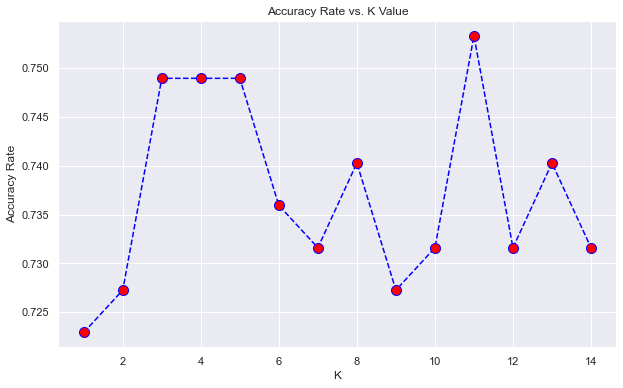

In [70]:
plt.figure(figsize=(10,6))

plt.plot(range(1,15),test_scores,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [71]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)


0.7532467532467533

#### Confusion Matrix

In [72]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,127,23,150
1,34,47,81
All,161,70,231


## KNN ON REGRESSION

In [88]:
from sklearn.datasets import load_boston
data = load_boston()



In [89]:
data = pd.DataFrame(data.data, columns=data.feature_names)
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [99]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000104D95375B0>,
      dtype=object)

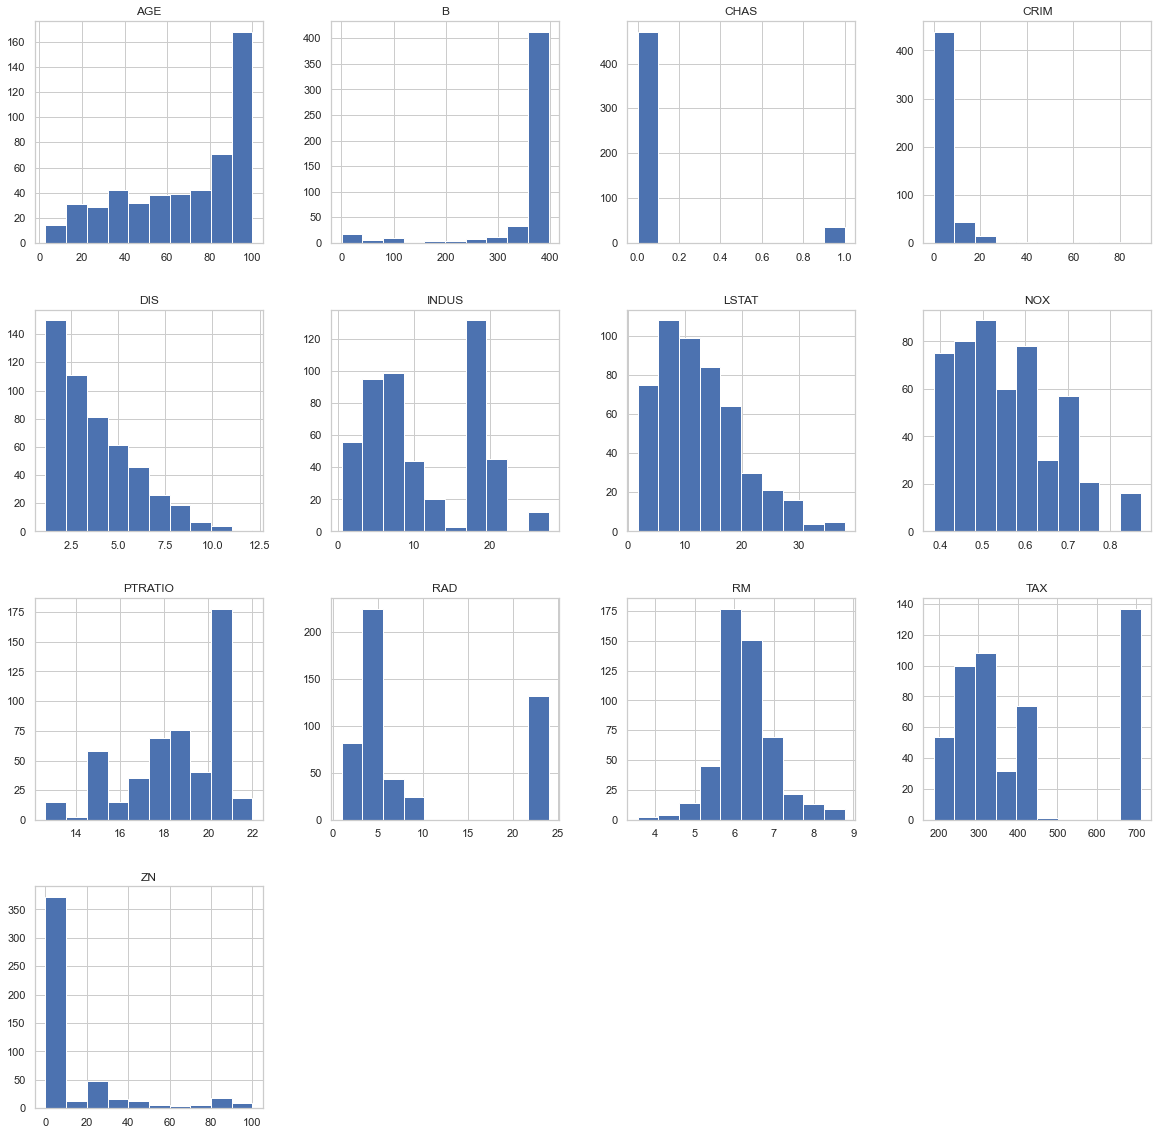

In [121]:
data.hist(figsize = (20,20))

In [123]:
data.describe(percentiles = [.05,.10,.15,.20,.25,.5,.75,.90,.95,.99])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
5%,0.027910,0.000000,2.180000,0.000000,0.409250,5.314000,17.725000,1.461975,2.000000,222.000000,14.700000,84.590000,3.707500
10%,0.038195,0.000000,2.910000,0.000000,0.427000,5.593500,26.950000,1.628300,3.000000,233.000000,14.750000,290.270000,4.680000
15%,0.050770,0.000000,3.640000,0.000000,0.436500,5.712000,32.200000,1.802200,3.000000,254.750000,15.575000,343.857500,5.465000
20%,0.064170,0.000000,4.390000,0.000000,0.442000,5.837000,37.800000,1.951200,4.000000,273.000000,16.600000,364.310000,6.290000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000


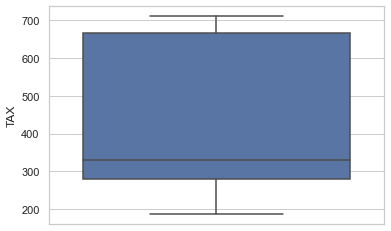

In [127]:
sns.boxplot(y = data.TAX)

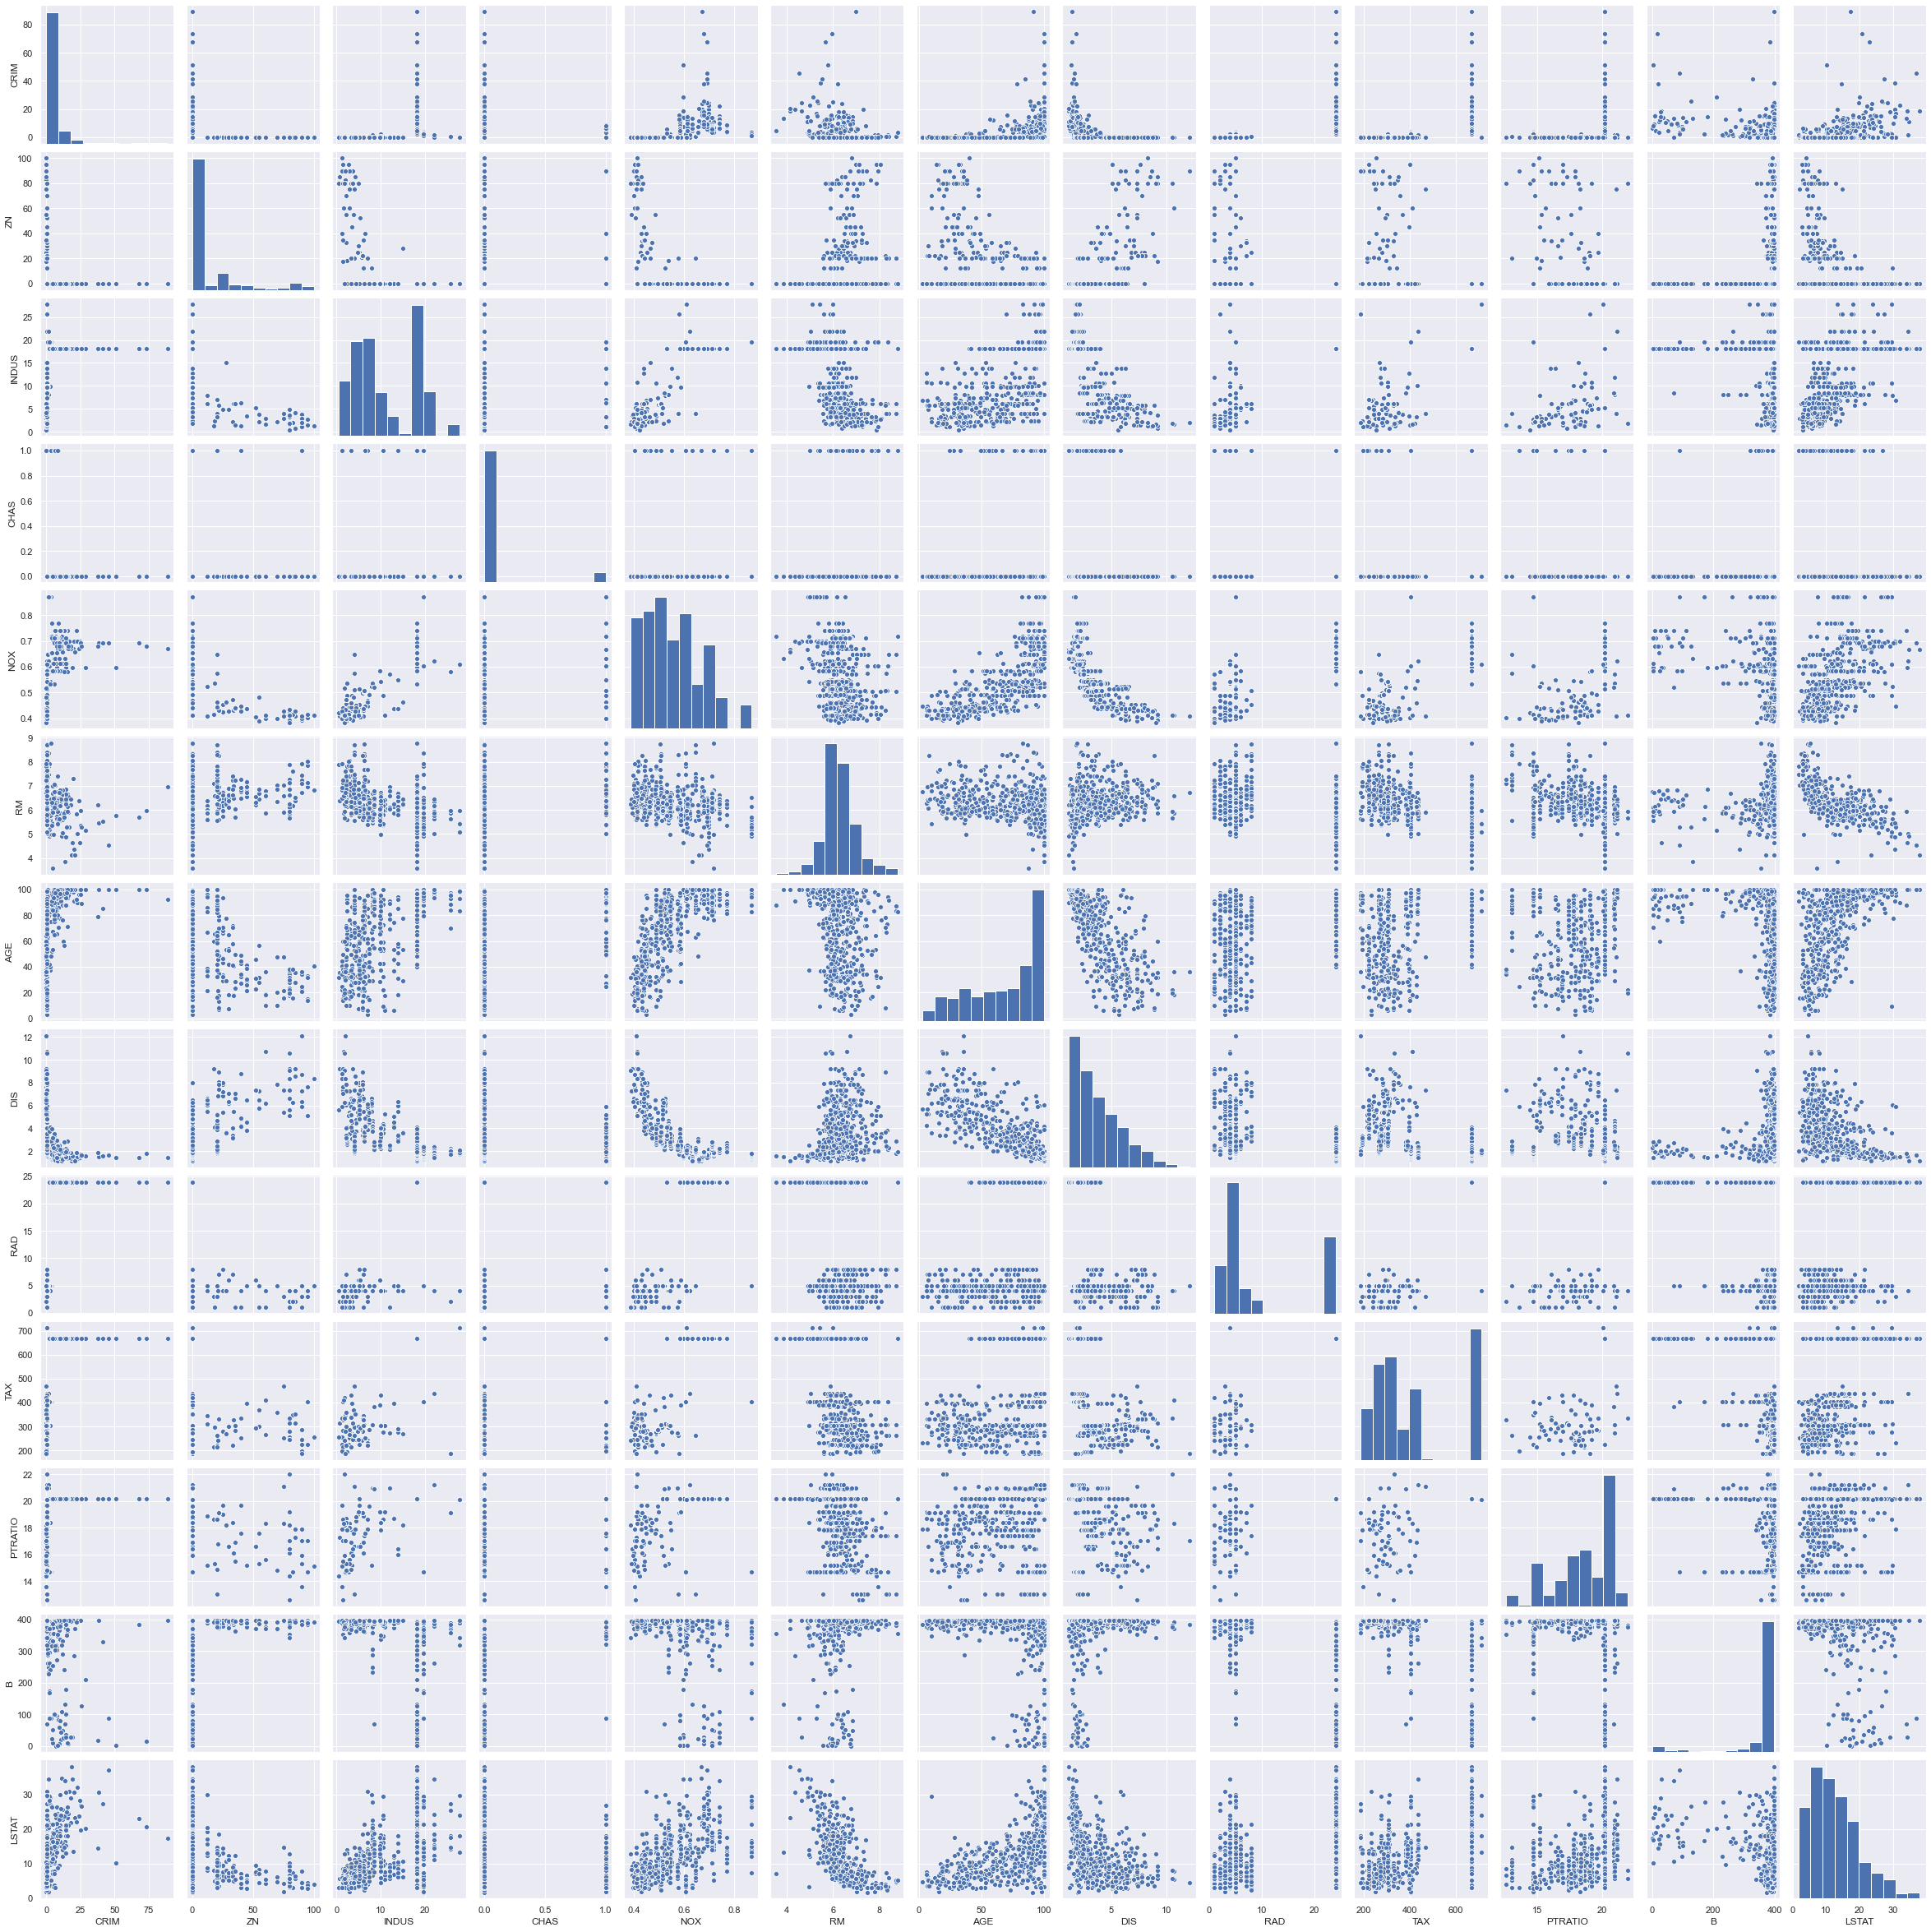

In [100]:
sns.pairplot(data)

In [91]:
X = data
y = X.TAX
X = X.drop("TAX",1)

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [98]:
y_train

5      222.0
116    432.0
45     233.0
16     307.0
468    666.0
       ...  
106    384.0
270    223.0
348    280.0
435    666.0
102    384.0
Name: TAX, Length: 354, dtype: float64

In [111]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 2)
regressor = KNeighborsRegressor(n_neighbors=2)

# Fitting the model
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [112]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.9087589930767745

In [107]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [109]:
score = []
for k in range(1,20):
    reg = KNeighborsRegressor(n_neighbors = k, p=2, metric='minkowski')
    reg.fit(X_train, y_train)
    score.append(reg.score(X_test, y_test ))
    
    
k_max = score.index(max(score))+1
print( "At K = {}, Max Accuracy = {}".format(k_max, max(score)*100))


At K = 3, Max Accuracy = 93.41615338038105


Text(0, 0.5, 'Accuracy Rate')

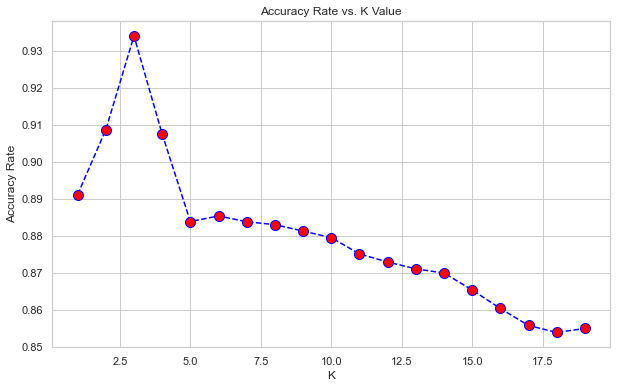

In [110]:
plt.figure(figsize=(10,6))

plt.plot(range(1,20),score,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [113]:
reg = KNeighborsRegressor(n_neighbors = 3, p=2, metric='minkowski')
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [114]:
reg.score(X_train, y_train)

0.951721461179536

In [115]:
reg.score(X_test, y_test)

0.9341615338038105

In [116]:
y_pred = reg.predict(X_test)

In [118]:
y_comp = pd.DataFrame(y_pred,y_test,columns = ["Predicted"])

In [119]:
y_comp

,Predicted
TAX,
296.0,299.666667
254.0,243.666667
711.0,536.666667
305.0,312.000000
666.0,666.000000
...,...
666.0,666.000000
307.0,307.000000
307.0,307.000000


In [120]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9341615338038105